# Laboratorium 1


### Konfiguracja

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [201]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


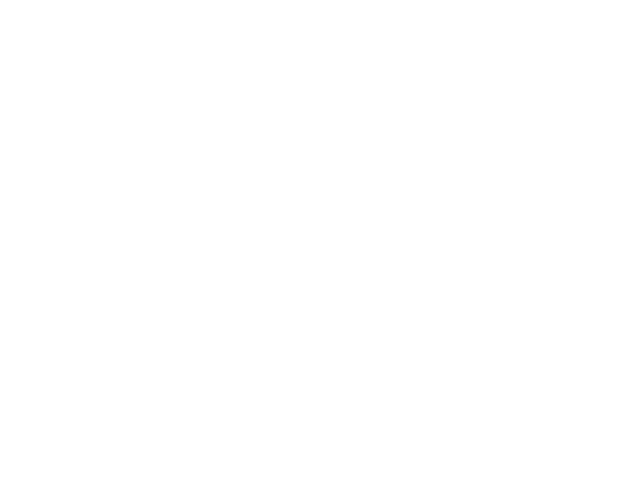

In [202]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [203]:
%matplotlib notebook

from random import random, choice
from math import sin, cos
from enum import Enum, auto
import math

signs = [-1, 1]

In [204]:
def generate_points_within_range(count, max):
    points = [(0.0, 0.0)] * count
    
    for i in range(count):    
        x = random() * max * choice(signs)
        y = random() * max * choice(signs)
        
        points[i] = (x, y)
        
    return points

def generate_points_a():
    return generate_points_within_range(10 ** 5, 10 ** 3)

def generate_points_b():
    return generate_points_within_range(10 ** 5, 10 ** 14)

In [205]:
def generate_points_c():
    radius = 100.0
    count = 1000
    points = [(0.0, 0.0)] * count
    
    for i in range(count):
        t = random()
        
        x = cos(2 * math.pi / t)
        y = sin(2 * math.pi / t)
        
        points[i] = (x * radius, y * radius)
    
    return points
    

In [206]:
def generate_points_d():
    count = 1000
    max = 1000
    
    point_a = (-1.0, 0.0)
    point_b = (1.0, 0.1)
    
    a = (point_a[0] - point_b[0]) / (point_a[1] - point_b[1])
    b = (-a) * point_a[0] + point_a[1]
    
    points = []    
    
    for _ in range(count):
        x = random() * max * choice(signs)
        points.append((x, a * x + b))
    
    return points    
    

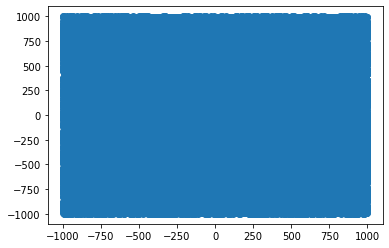

In [207]:
%matplotlib inline

points = generate_points_a()

plot = Plot([PointsCollection(points)])
plot.draw()

In [208]:
### Calculating determinant using Sarrus formula.
def det_1(a, b, c):
    return a[0] * b[1] + a[1] * b[0] + b[0] * c[1] - b[1] * c[0] - a[0] * c[1] - a[1] * b[0]

### Calculating determinant using standard 2x2 determinant formula.
def det_2(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])

In [209]:
class Orientation(Enum):
    LEFT = auto()
    RIGHT = auto()
    COLLINEAR = auto()

In [210]:
def classify_point(c, epsilon, det):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    
    determinant = det(a, b, c)
    orientation = Orientation.COLLINEAR
    
    if determinant > epsilon:
        orientation = Orientation.LEFT
    elif determinant < -epsilon:
        orientation = Orientation.RIGHT
    
    return orientation

In [211]:
def classify(points, epsilon, det):
    
    left, collinear, right = [], [], []
    
    for point in points:
        orientation = classify_point(point, epsilon, det)
        
        if orientation == Orientation.LEFT:
            left.append(point)
        elif orientation == Orientation.RIGHT:
            right.append(point)
        else:
            collinear.append(point)

    return left, collinear, right

In [212]:
epsilon_0 = 10
epsilon_1 = 1
epsilon_2 = 10 ** (-3)
epsilon_3 = 10 ** (-14)

In [213]:
%matplotlib notebook

def show_results(points, epsilon, det):
    (left, collinear, right) = classify(points, epsilon, det)

    plot = Plot([
        PointsCollection(left),
        PointsCollection(right, color='red'),
        PointsCollection(collinear, color='green')])
    
    print("Classified LEFT: {0} \nClassified RIGHT: {1} \nClassified COLLINEAR: {2}"
          .format(len(left), len(right), len(collinear)))

    plot.draw()

In [214]:
### Classification of set A
points_a = generate_points_a()

Classified LEFT: 49764 
Classified RIGHT: 49683 
Classified COLLINEAR: 553


<IPython.core.display.Javascript object>


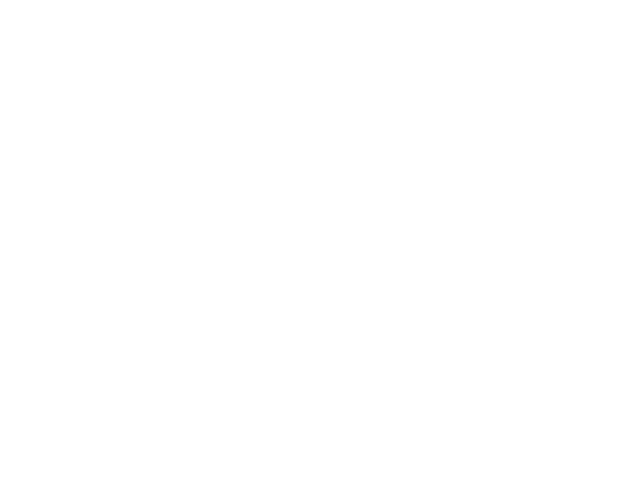

In [215]:
%matplotlib notebook

show_results(points_a, epsilon_0, det_1)

Classified LEFT: 50010 
Classified RIGHT: 49948 
Classified COLLINEAR: 42


<IPython.core.display.Javascript object>


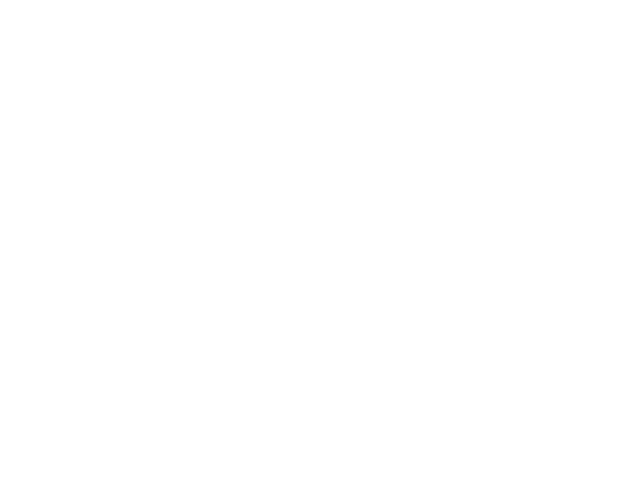

In [216]:
%matplotlib notebook

show_results(points_a, epsilon_1, det_1)

Classified LEFT: 50010 
Classified RIGHT: 49948 
Classified COLLINEAR: 42


<IPython.core.display.Javascript object>


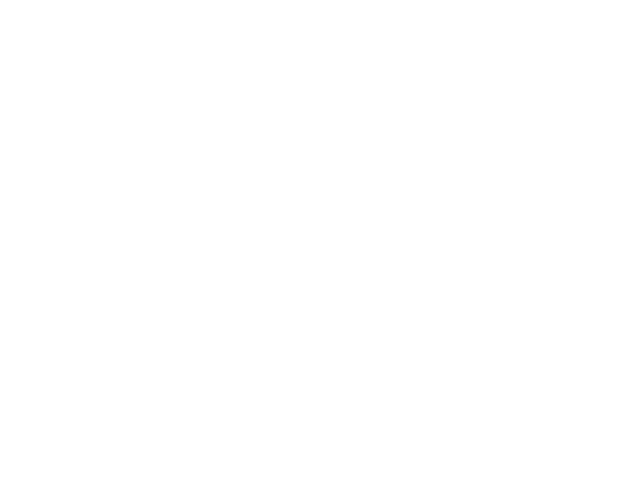

In [217]:
%matplotlib notebook

show_results(points_a, epsilon_1, det_2)

Classified LEFT: 50030 
Classified RIGHT: 49970 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


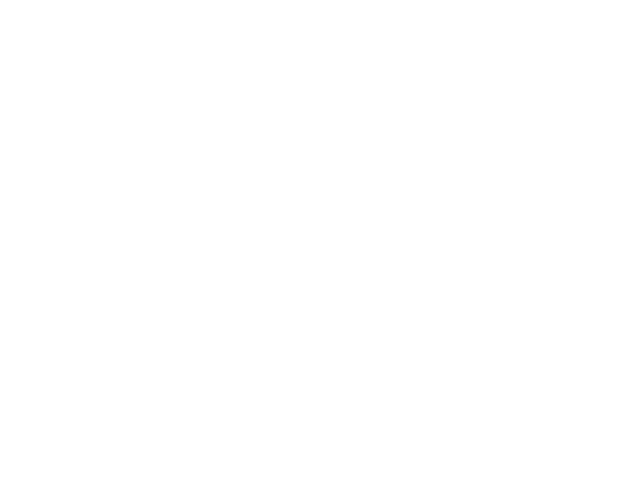

In [218]:
%matplotlib notebook

show_results(points_a, epsilon_2, det_1)

Classified LEFT: 50030 
Classified RIGHT: 49970 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


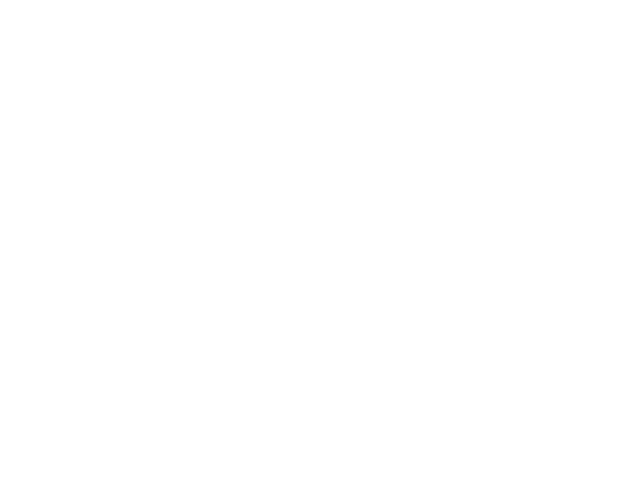

In [219]:
%matplotlib notebook

show_results(points_a, epsilon_2, det_2)

Classified LEFT: 50030 
Classified RIGHT: 49970 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


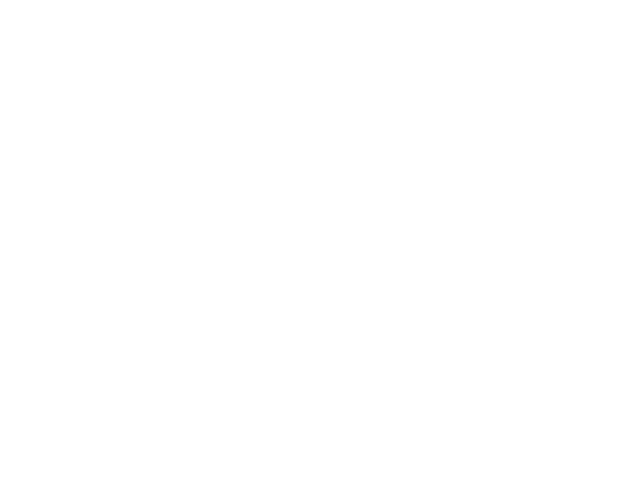

In [220]:
%matplotlib notebook

show_results(points_a, epsilon_3, det_1)

Classified LEFT: 50030 
Classified RIGHT: 49970 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


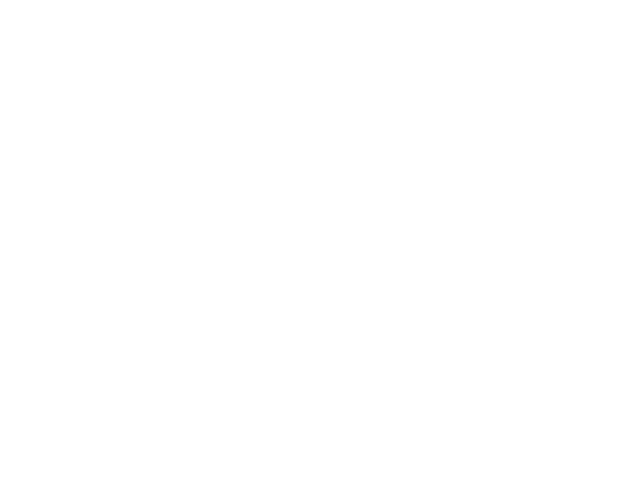

In [221]:
%matplotlib notebook

show_results(points_a, epsilon_3, det_2)

In [222]:
### Classification of set B

points_b = generate_points_b()

Classified LEFT: 50021 
Classified RIGHT: 49979 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


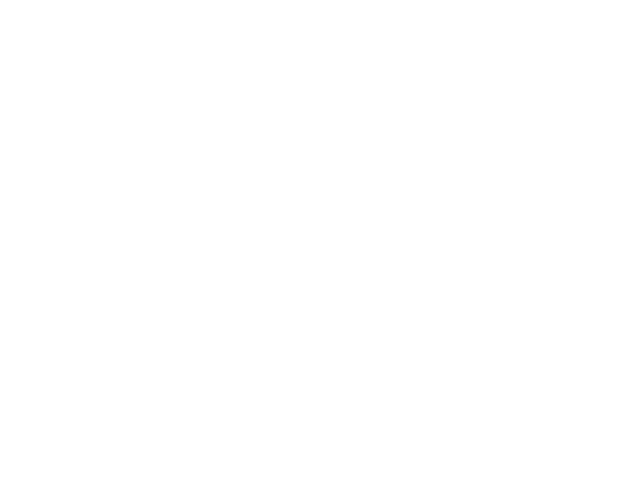

In [223]:
%matplotlib notebook

show_results(points_b, epsilon_0, det_1)

Classified LEFT: 50021 
Classified RIGHT: 49979 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


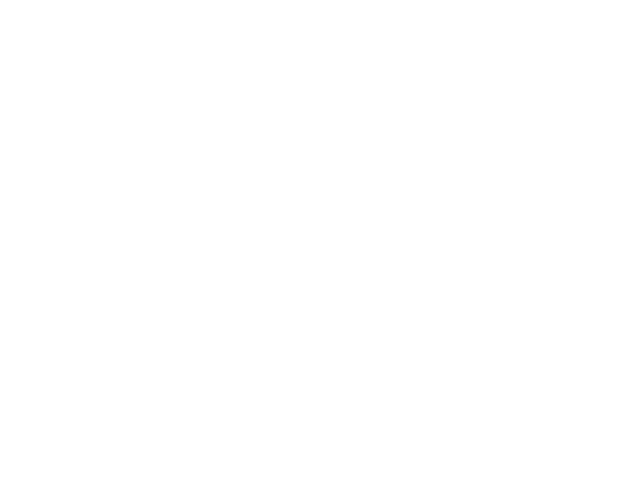

In [224]:
%matplotlib notebook

show_results(points_b, epsilon_1, det_1)

Classified LEFT: 50018 
Classified RIGHT: 49977 
Classified COLLINEAR: 5


<IPython.core.display.Javascript object>


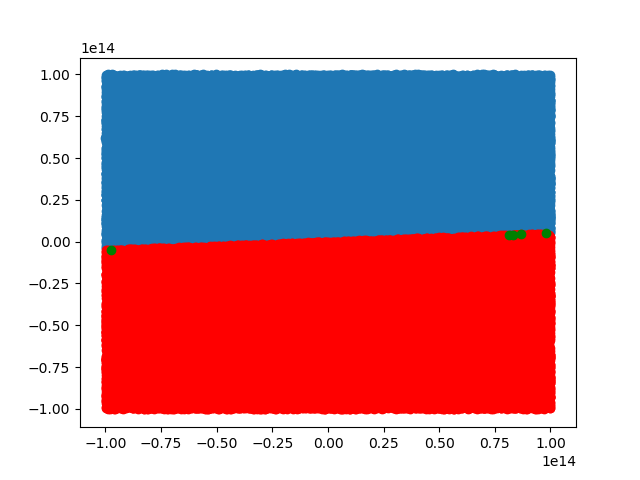

In [248]:
%matplotlib notebook

show_results(points_b, epsilon_1, det_2)

Classified LEFT: 50021 
Classified RIGHT: 49979 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


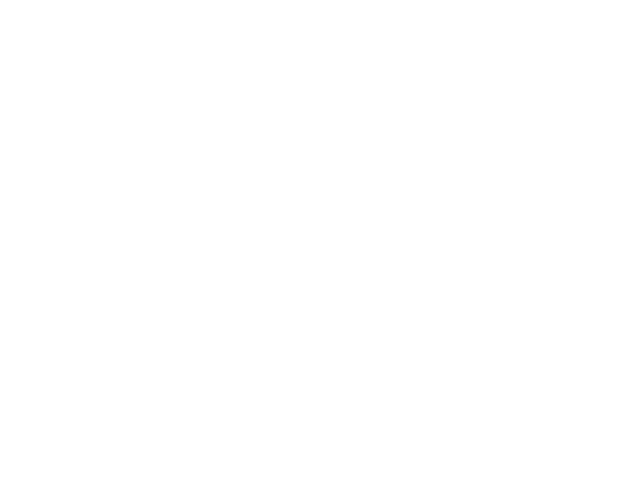

In [226]:
%matplotlib notebook

show_results(points_b, epsilon_2, det_1)

Classified LEFT: 50018 
Classified RIGHT: 49977 
Classified COLLINEAR: 5


<IPython.core.display.Javascript object>


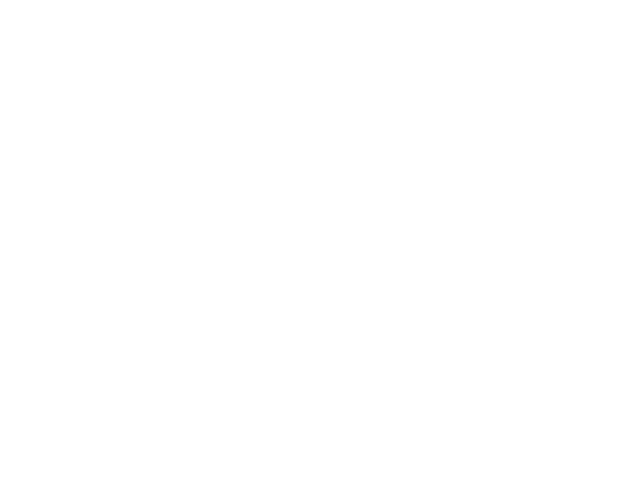

In [227]:
%matplotlib notebook

show_results(points_b, epsilon_2, det_2)

Classified LEFT: 50021 
Classified RIGHT: 49979 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


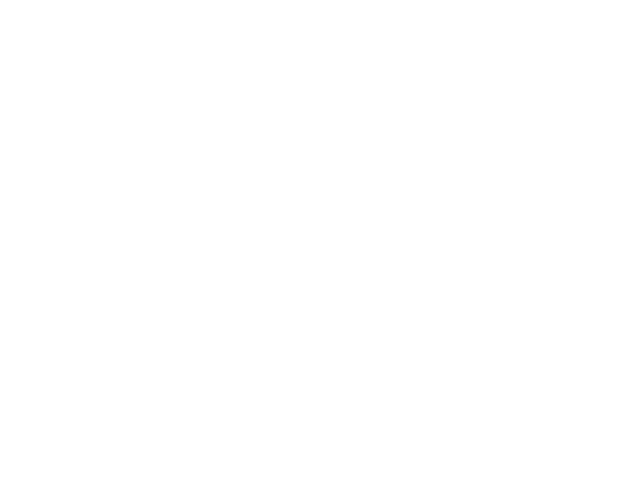

In [228]:
%matplotlib notebook

show_results(points_b, epsilon_3, det_1)

Classified LEFT: 50018 
Classified RIGHT: 49977 
Classified COLLINEAR: 5


<IPython.core.display.Javascript object>


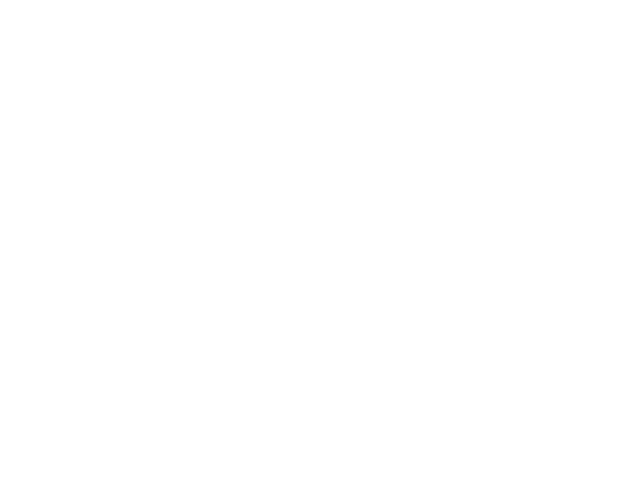

In [229]:
%matplotlib notebook

show_results(points_b, epsilon_3, det_2)

In [230]:
### Classification of set C

points_c = generate_points_c()

Classified LEFT: 596 
Classified RIGHT: 356 
Classified COLLINEAR: 48


<IPython.core.display.Javascript object>


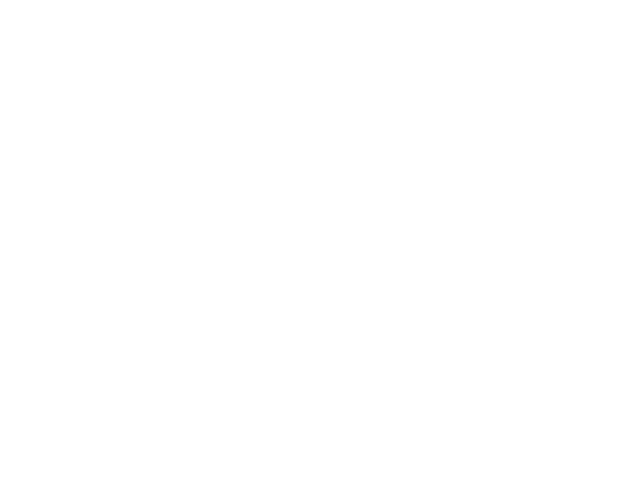

In [231]:
%matplotlib notebook

show_results(points_c, epsilon_0, det_1)

Classified LEFT: 596 
Classified RIGHT: 356 
Classified COLLINEAR: 48


<IPython.core.display.Javascript object>


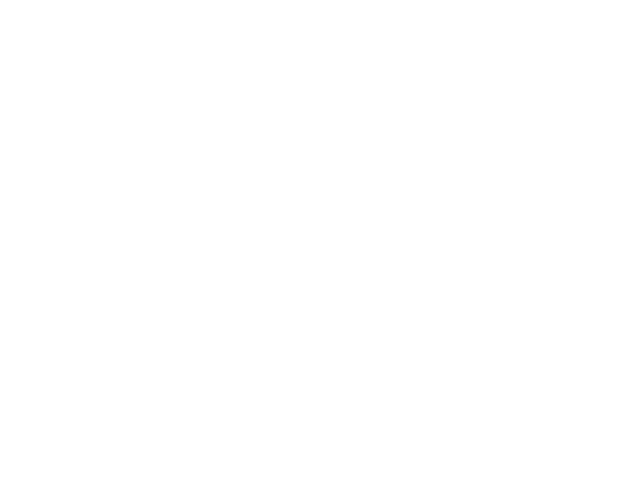

In [232]:
%matplotlib notebook

show_results(points_c, epsilon_0, det_1)

Classified LEFT: 616 
Classified RIGHT: 376 
Classified COLLINEAR: 8


<IPython.core.display.Javascript object>


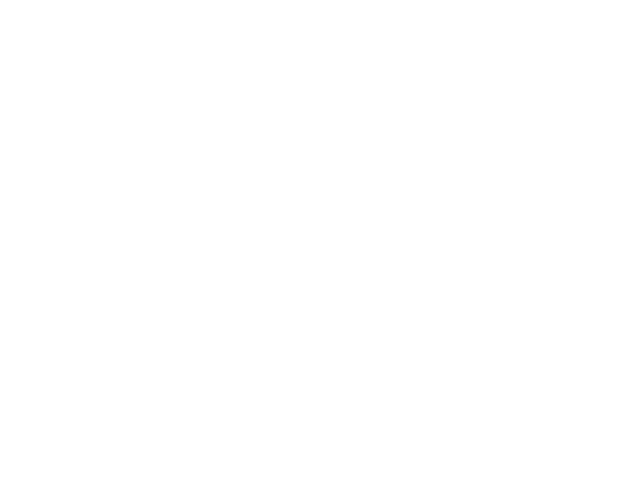

In [233]:
%matplotlib notebook

show_results(points_c, epsilon_1, det_1)

Classified LEFT: 616 
Classified RIGHT: 376 
Classified COLLINEAR: 8


<IPython.core.display.Javascript object>


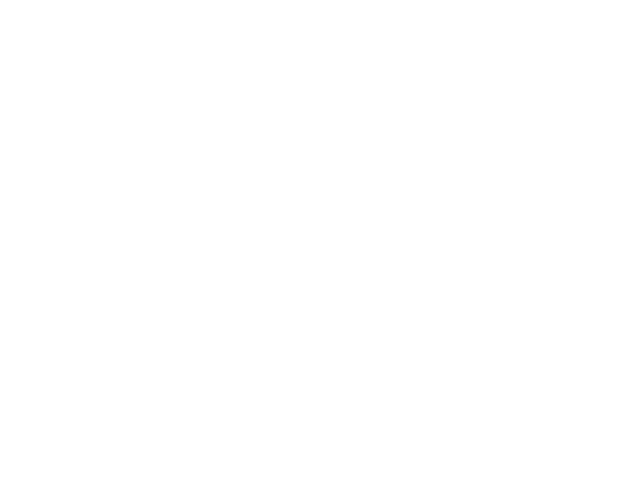

In [234]:
%matplotlib notebook

show_results(points_c, epsilon_1, det_2)

Classified LEFT: 620 
Classified RIGHT: 380 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


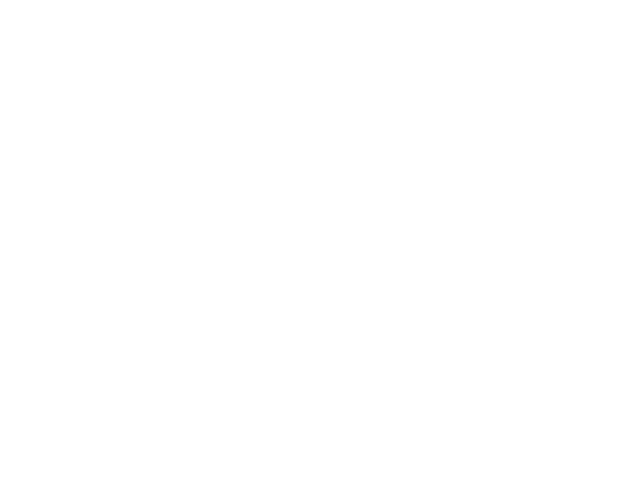

In [235]:
%matplotlib notebook

show_results(points_c, epsilon_2, det_1)

Classified LEFT: 620 
Classified RIGHT: 380 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


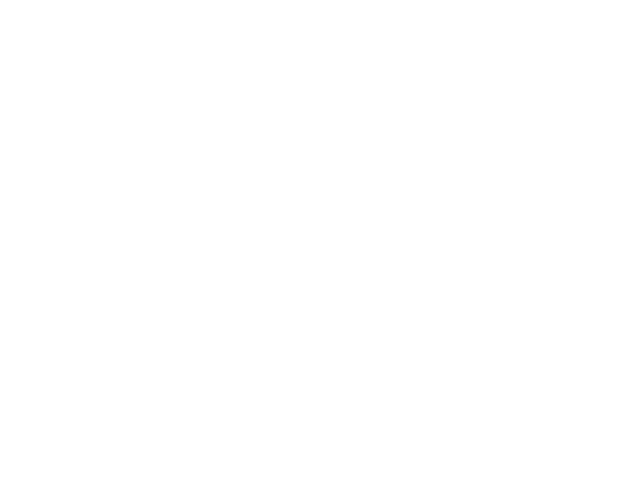

In [236]:
%matplotlib notebook

show_results(points_c, epsilon_2, det_2)

Classified LEFT: 620 
Classified RIGHT: 380 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


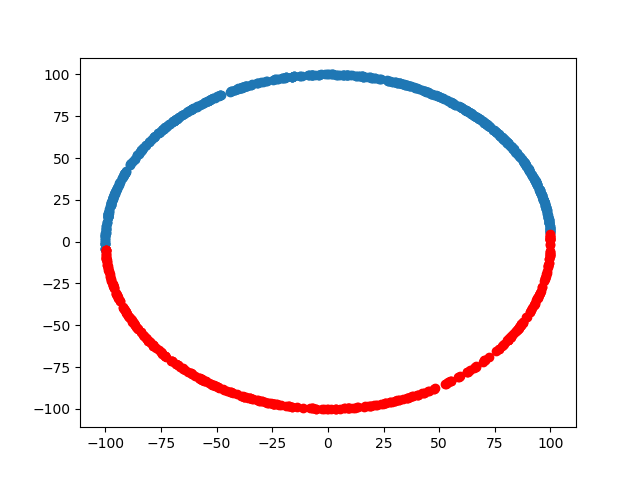

In [247]:
%matplotlib notebook

show_results(points_c, epsilon_3, det_1)

Classified LEFT: 620 
Classified RIGHT: 380 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


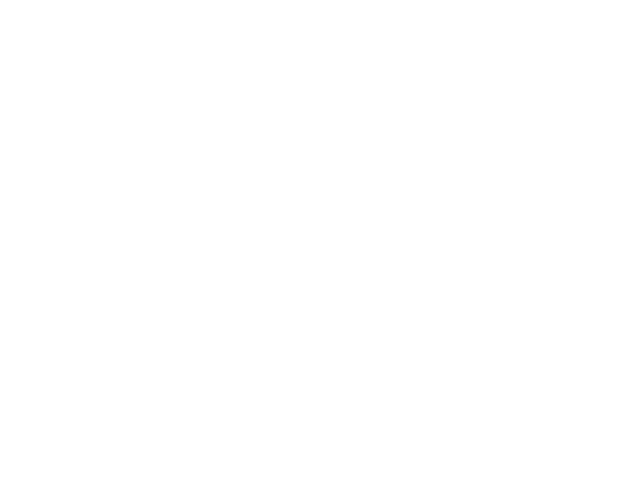

In [238]:
%matplotlib notebook

show_results(points_c, epsilon_3, det_2)

In [239]:
### Classification os set D

points_d = generate_points_d()

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


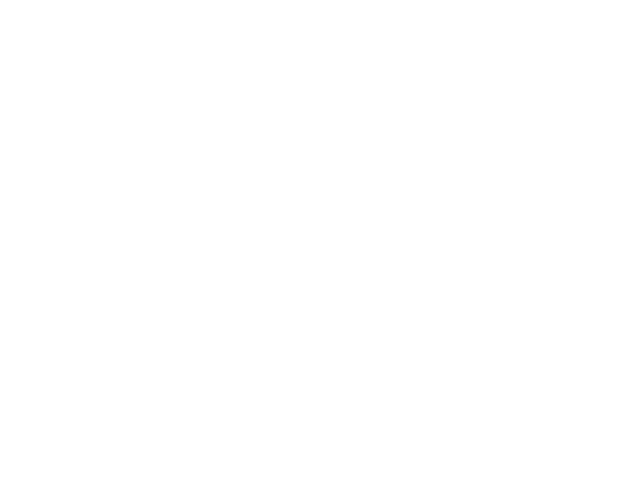

In [240]:
%matplotlib notebook

show_results(points_d, epsilon_0, det_1)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


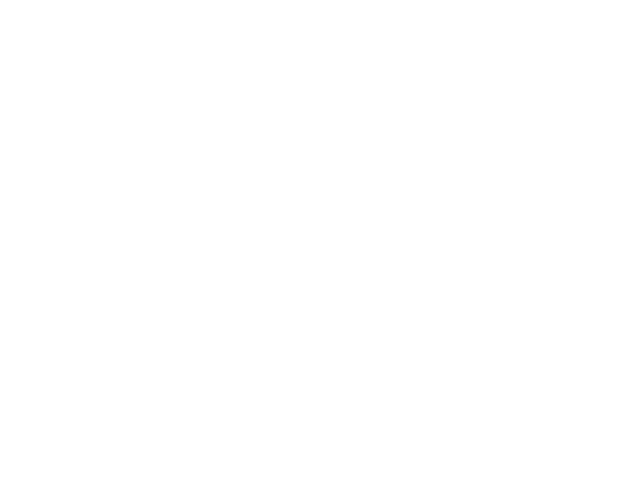

In [241]:
%matplotlib notebook

show_results(points_d, epsilon_1, det_1)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


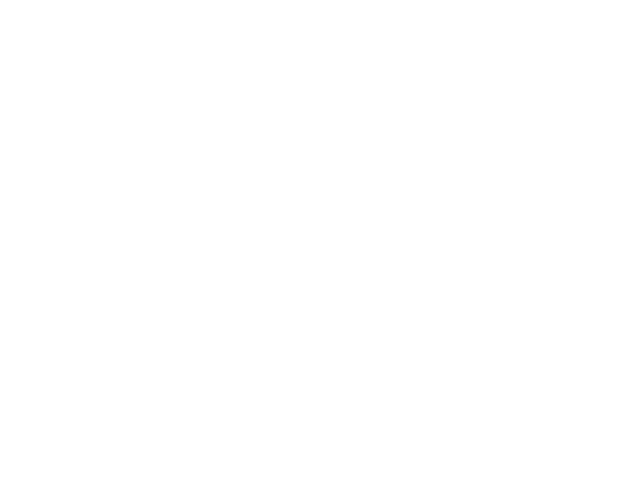

In [242]:
%matplotlib notebook

show_results(points_d, epsilon_1, det_2)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


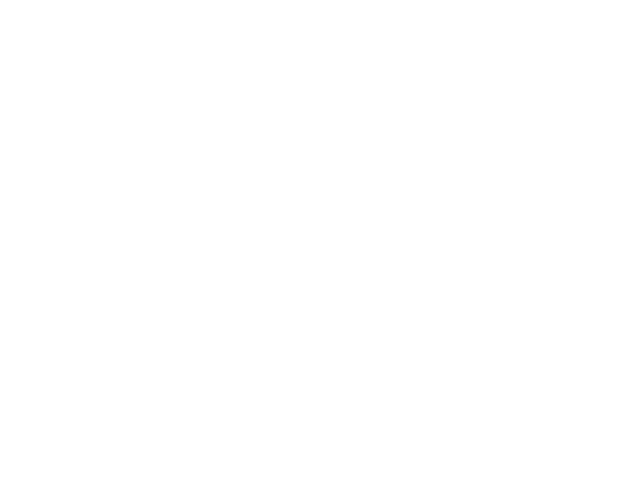

In [243]:
%matplotlib notebook

show_results(points_d, epsilon_2, det_1)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


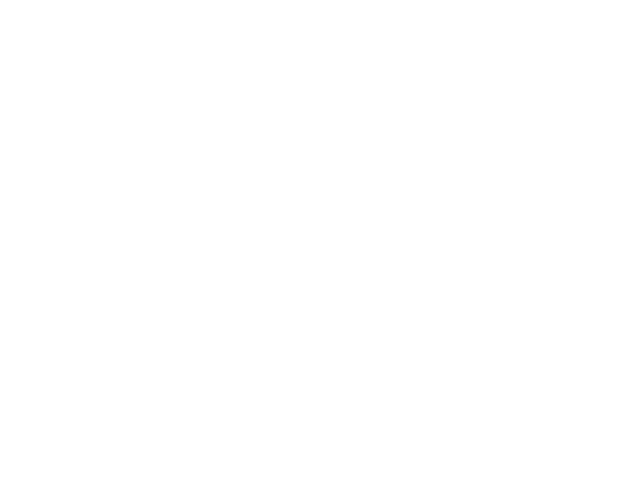

In [244]:
%matplotlib notebook

show_results(points_d, epsilon_2, det_2)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


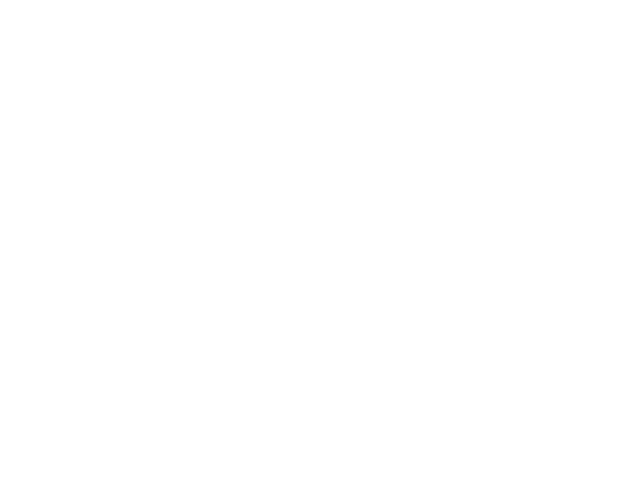

In [245]:
%matplotlib notebook

show_results(points_d, epsilon_3, det_1)

Classified LEFT: 492 
Classified RIGHT: 508 
Classified COLLINEAR: 0


<IPython.core.display.Javascript object>


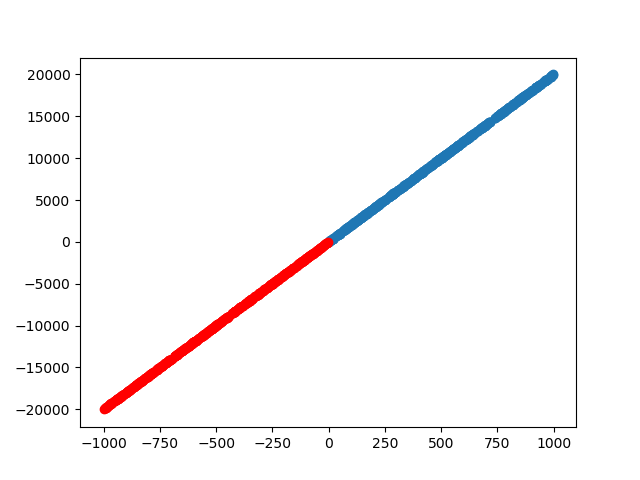

In [246]:
%matplotlib notebook

show_results(points_d, epsilon_3, det_2)